# Load data

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [26]:
coding = pd.read_csv("coding_9_features.csv")
noncoding = pd.read_csv("noncoding_9_features_diff.csv")

In [27]:
coding = coding.drop("ORF Ratio", axis=1)

In [28]:
coding.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
0,0.3871,0.359435,18,2618,981,0.284229,9.588915,0.112385,1
1,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1
2,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1
3,1.0718,0.699278,302,3465,2535,0.270346,11.870000,0.051948,1
4,1.0718,0.699250,302,3468,2538,0.271500,11.870000,0.051903,1


In [29]:
coding["ORF Ratio"] = coding["ORF Length"] / coding["Transcript Length"]

In [30]:
coding.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio
0,0.3871,0.359435,18,2618,981,0.284229,9.588915,0.112385,1,0.374714
1,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000
2,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000
3,1.0718,0.699278,302,3465,2535,0.270346,11.870000,0.051948,1,0.731602
4,1.0718,0.699250,302,3468,2538,0.271500,11.870000,0.051903,1,0.731834


In [31]:
coding["CpG Islands per ORF Length"] = coding["CpG Islands"] / coding["ORF Length"]

In [32]:
coding.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length
0,0.3871,0.359435,18,2618,981,0.284229,9.588915,0.112385,1,0.374714,0.018349
1,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000,0.008520
2,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000,0.008520
3,1.0718,0.699278,302,3465,2535,0.270346,11.870000,0.051948,1,0.731602,0.119132
4,1.0718,0.699250,302,3468,2538,0.271500,11.870000,0.051903,1,0.731834,0.118991


In [33]:
coding["GC content per ORF Length"] = coding["GC content"] / coding["ORF Length"]

In [34]:
coding.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
0,0.3871,0.359435,18,2618,981,0.284229,9.588915,0.112385,1,0.374714,0.018349,0.000366
1,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000,0.008520,0.000490
2,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000,0.008520,0.000490
3,1.0718,0.699278,302,3465,2535,0.270346,11.870000,0.051948,1,0.731602,0.119132,0.000276
4,1.0718,0.699250,302,3468,2538,0.271500,11.870000,0.051903,1,0.731834,0.118991,0.000276


In [35]:
coding.drop("coding/noncoding", axis=1)

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
0,0.3871,0.359435,18,2618,981,0.284229,9.588915,0.112385,0.374714,0.018349,0.000366
1,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1.000000,0.008520,0.000490
2,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1.000000,0.008520,0.000490
3,1.0718,0.699278,302,3465,2535,0.270346,11.870000,0.051948,0.731602,0.119132,0.000276
4,1.0718,0.699250,302,3468,2538,0.271500,11.870000,0.051903,0.731834,0.118991,0.000276
...,...,...,...,...,...,...,...,...,...,...,...
111270,1.1760,0.401734,9,346,54,0.647228,4.454040,0.095652,0.156069,0.166667,0.007440
111271,1.1895,0.430976,6,297,297,0.843020,5.727063,0.071429,1.000000,0.020202,0.001451
111272,1.2356,0.442671,31,1378,300,0.423575,9.402150,0.074074,0.217707,0.103333,0.001476
111273,1.2880,0.449227,40,1812,201,0.358543,9.144276,0.091211,0.110927,0.199005,0.002235


In [36]:
coding["coding/noncoding"] = 1

In [37]:
coding.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
0,0.3871,0.359435,18,2618,981,0.284229,9.588915,0.112385,1,0.374714,0.018349,0.000366
1,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000,0.008520,0.000490
2,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000,0.008520,0.000490
3,1.0718,0.699278,302,3465,2535,0.270346,11.870000,0.051948,1,0.731602,0.119132,0.000276
4,1.0718,0.699250,302,3468,2538,0.271500,11.870000,0.051903,1,0.731834,0.118991,0.000276


In [38]:
coding.shape

(111275, 12)

In [39]:
noncoding.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
0,0.5161,0.553539,23,1653,390,390,0.466010,8.557163,0.079855,0
1,0.5317,0.552933,21,1483,402,402,0.428935,8.525573,0.056680,0
2,0.6679,0.580696,10,632,180,180,0.591729,8.961508,0.057143,0
3,0.5273,0.617357,18,507,165,165,0.659118,11.371079,0.059172,0
4,0.6262,0.597692,34,1213,165,165,0.529159,10.728845,0.059406,0


In [40]:
noncoding = noncoding.drop("ORF Ratio", axis=1)

In [41]:
noncoding["ORF Ratio"] = noncoding["ORF Length"] / noncoding["Transcript Length"]

In [42]:
noncoding["CpG Islands per ORF Length"] = noncoding["CpG Islands"] / noncoding["ORF Length"]

In [43]:
noncoding["GC content per ORF Length"] = noncoding["GC content"] / noncoding["ORF Length"]

In [44]:
noncoding.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
0,0.5161,0.553539,23,1653,390,0.466010,8.557163,0.079855,0,0.235935,0.058974,0.001419
1,0.5317,0.552933,21,1483,402,0.428935,8.525573,0.056680,0,0.271072,0.052239,0.001375
2,0.6679,0.580696,10,632,180,0.591729,8.961508,0.057143,0,0.284810,0.055556,0.003226
3,0.5273,0.617357,18,507,165,0.659118,11.371079,0.059172,0,0.325444,0.109091,0.003742
4,0.6262,0.597692,34,1213,165,0.529159,10.728845,0.059406,0,0.136026,0.206061,0.003622


In [45]:
noncoding.shape

(173111, 12)

In [46]:
# taking 111200 sequences from both dataframes
noncoding = noncoding.head(111200)
coding = coding.head(111200)

In [47]:
# combining both dataframes
dataset1 = coding.merge(noncoding, how = "outer")


In [48]:
dataset1.shape

(222400, 12)

In [49]:
dataset1.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
0,0.3871,0.359435,18,2618,981,0.284229,9.588915,0.112385,1,0.374714,0.018349,0.000366
1,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000,0.008520,0.000490
2,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000,0.008520,0.000490
3,1.0718,0.699278,302,3465,2535,0.270346,11.870000,0.051948,1,0.731602,0.119132,0.000276
4,1.0718,0.699250,302,3468,2538,0.271500,11.870000,0.051903,1,0.731834,0.118991,0.000276


In [50]:
dataset1.tail()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
222395,0.4830,0.494624,7,558,159,0.459977,4.953825,0.096774,0,0.284946,0.044025,0.003111
222396,0.5244,0.574233,52,815,183,0.418751,9.658154,0.077491,0,0.224540,0.284153,0.003138
222397,0.5020,0.415437,3,881,120,0.450101,9.149240,0.129693,0,0.136209,0.025000,0.003462
222398,0.4081,0.373988,18,3706,357,0.261959,9.695288,0.111741,0,0.096330,0.050420,0.001048
222399,0.4855,0.492435,28,727,162,0.358038,9.196044,0.128099,0,0.222834,0.172840,0.003040


In [51]:
# shuffle the dataset
shuffled_dataset = dataset1.sample(frac=1, random_state = 42)

In [52]:
shuffled_dataset.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
130060,0.4871,0.440096,15,1252,246,0.418197,9.973082,0.086331,0,0.196486,0.060976,0.001789
122973,0.4975,0.634871,89,1279,186,0.365943,11.686200,0.042254,0,0.145426,0.478495,0.003413
143354,0.3740,0.402494,9,2005,201,0.371544,9.831574,0.079341,0,0.100249,0.044776,0.002002
210043,0.4390,0.480164,11,731,141,0.427099,7.667375,0.106996,0,0.192886,0.078014,0.003405
106295,1.2011,0.611160,65,1147,681,0.424952,10.347965,0.023560,1,0.593723,0.095448,0.000897


In [53]:
shuffled_dataset

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
130060,0.4871,0.440096,15,1252,246,0.418197,9.973082,0.086331,0,0.196486,0.060976,0.001789
122973,0.4975,0.634871,89,1279,186,0.365943,11.686200,0.042254,0,0.145426,0.478495,0.003413
143354,0.3740,0.402494,9,2005,201,0.371544,9.831574,0.079341,0,0.100249,0.044776,0.002002
210043,0.4390,0.480164,11,731,141,0.427099,7.667375,0.106996,0,0.192886,0.078014,0.003405
106295,1.2011,0.611160,65,1147,681,0.424952,10.347965,0.023560,1,0.593723,0.095448,0.000897
...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.4394,0.467187,4,640,138,0.482877,9.163359,0.089202,0,0.215625,0.028986,0.003385
103694,0.6674,0.402305,131,5379,3378,0.282702,9.935884,0.108199,1,0.627998,0.038780,0.000119
131932,0.3939,0.463635,118,5651,330,0.332367,9.824224,0.101488,0,0.058397,0.357576,0.001405
146867,0.4794,0.401091,2,733,159,0.525984,9.331428,0.098361,0,0.216917,0.012579,0.002523


In [54]:
print(shuffled_dataset.isna().sum())

Fickett Score                   0
GC content                      0
CpG Islands                     0
Transcript Length               0
ORF Length                      0
Relative Codon Bias             0
Isoelectric Potential           0
Aromaticity                     0
coding/noncoding                0
ORF Ratio                       0
CpG Islands per ORF Length    106
GC content per ORF Length       0
dtype: int64


In [55]:
import numpy as np
print(np.isinf(shuffled_dataset).sum())

Fickett Score                    0
GC content                       0
CpG Islands                      0
Transcript Length                0
ORF Length                       0
Relative Codon Bias              0
Isoelectric Potential            0
Aromaticity                      0
coding/noncoding                 0
ORF Ratio                        0
CpG Islands per ORF Length    2429
GC content per ORF Length     2535
dtype: int64


In [56]:
shuffled_dataset.replace([np.inf, -np.inf], 0, inplace=True)

In [57]:
# shuffled_dataset = shuffled_dataset.drop("CpG Islands per ORF Length", axis=1)

In [58]:
shuffled_dataset.fillna(0, inplace=True)

# Test Train Split (222400)

In [59]:
train, test = train_test_split(shuffled_dataset, test_size=0.2, random_state=42)

In [60]:
train.shape

(177920, 11)

In [61]:
test.shape

(44480, 11)

In [506]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Logistic Regression

### Added New Features

In [62]:
coding

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
0,0.3871,0.359435,18,2618,981,0.284229,9.588915,0.112385,1,0.374714,0.018349,0.000366
1,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000,0.008520,0.000490
2,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000,0.008520,0.000490
3,1.0718,0.699278,302,3465,2535,0.270346,11.870000,0.051948,1,0.731602,0.119132,0.000276
4,1.0718,0.699250,302,3468,2538,0.271500,11.870000,0.051903,1,0.731834,0.118991,0.000276
...,...,...,...,...,...,...,...,...,...,...,...,...
111195,0.8228,0.384946,11,1395,1206,0.334988,9.944393,0.088172,1,0.864516,0.009121,0.000319
111196,0.4149,0.409025,11,1374,645,0.416163,10.096990,0.113537,1,0.469432,0.017054,0.000634
111197,0.6311,0.369942,8,1038,612,0.560306,9.749312,0.110465,1,0.589595,0.013072,0.000604
111198,0.4149,0.407194,11,1390,645,0.421026,10.093057,0.112311,1,0.464029,0.017054,0.000631


### Feature Combination Old Features (ORF Ratio unchanged) and dropped trans, RCB, IP, Arom, GC, CpG

In [63]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(['coding/noncoding', 'Transcript Length', 'Relative Codon Bias', 'Isoelectric Potential', 'Aromaticity', 'GC content', 'CpG Islands'], axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop(['coding/noncoding', 'Transcript Length', 'Relative Codon Bias', 'Isoelectric Potential', 'Aromaticity', 'GC content', 'CpG Islands'], axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8500449640287769


### Feature Combination With Changed ORF Ratio and dropped GC, Trans, RCB, IP, Arom

In [185]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(['coding/noncoding', 'GC content', 'Transcript Length', 'Relative Codon Bias', 'Isoelectric Potential', 'Aromaticity'], axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop(['coding/noncoding', 'GC content', 'Transcript Length', 'Relative Codon Bias', 'Isoelectric Potential', 'Aromaticity'], axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8537320143884892


## Feature Combination with GC per ORF dropped ORF Ratio

In [188]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(['coding/noncoding', 'ORF Ratio'], axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop(['coding/noncoding', 'ORF Ratio'], axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8581160071942446


### All Features except ORF Ratio

In [178]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(['coding/noncoding', 'ORF Ratio'], axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop(['coding/noncoding', 'ORF Ratio'], axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8581160071942446


### All Features

In [64]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop('coding/noncoding', axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop('coding/noncoding', axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8558678057553957


/home/jae-silver/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Mouse Dataset

In [33]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop('coding/noncoding', axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop('coding/noncoding', axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8762310606060606


### Mouse all

In [35]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop('coding/noncoding', axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop('coding/noncoding', axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8784615384615385


/home/jae-silver/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Small Dataset

In [263]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop('coding/noncoding', axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop('coding/noncoding', axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8672413793103448


### Large Dataset

In [23]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop('coding/noncoding', axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop('coding/noncoding', axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8544064748201439


# Random Forest

### Feature Combination Old Features (ORF Ratio unchanged) and dropped trans, RCB, IP, Arom, GC, CpG

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8873651079136691


### Feature Combination With Changed ORF Ratio and dropped GC, Trans, RCB, IP, Arom

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8877023381294964


## Feature Combination with GC per ORF dropped ORF Ratio

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8953462230215827


### All Features except ORF Ratio

In [508]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8953462230215827


### All Features

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8964028776978418


### Mouse Dataset

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


### Mouse All

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9017307692307692


### Small Dataset

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8915086206896552


### Large Dataset

In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8955260791366907


In [300]:
shuffled_dataset

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
130060,0.4871,0.440096,15,1252,246,246,0.418197,9.973082,0.086331,0
122973,0.4975,0.634871,89,1279,186,186,0.365943,11.686200,0.042254,0
143354,0.3740,0.402494,9,2005,201,201,0.371544,9.831574,0.079341,0
210043,0.4390,0.480164,11,731,141,141,0.427099,7.667375,0.106996,0
106295,1.2011,0.611160,65,1147,681,681,0.424952,10.347965,0.023560,1
...,...,...,...,...,...,...,...,...,...,...
119879,0.4394,0.467187,4,640,138,138,0.482877,9.163359,0.089202,0
103694,0.6674,0.402305,131,5379,3378,3378,0.282702,9.935884,0.108199,1
131932,0.3939,0.463635,118,5651,330,330,0.332367,9.824224,0.101488,0
146867,0.4794,0.401091,2,733,159,159,0.525984,9.331428,0.098361,0


In [258]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf, X_test, y_test)
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/home/jae-silver/anaconda3/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

# K Nearest Neighbours

In [26]:
X = shuffled_dataset.drop("coding/noncoding", axis=1) # Features
Y = shuffled_dataset["coding/noncoding"] # Target

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training set
knn.fit(X_train, Y_train)

# Predict the response for test dataset
Y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8333408273381295


# Naive Bayes Classifier

In [27]:
X = shuffled_dataset.drop("coding/noncoding", axis=1) # Features
Y = shuffled_dataset["coding/noncoding"] # Target

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier and fit it to the training data
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

# Predict the target variable on the test set
Y_pred = nb_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7875224820143885


# Support Vector Machine

In [ ]:
X = shuffled_dataset.drop("coding/noncoding", axis=1) # Features
Y = shuffled_dataset["coding/noncoding"] # Target

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# create the SVM model and fit it to the training data
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)

# predict the labels for the test set
Y_pred = clf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)

print('Accuracy:', accuracy)

# Gradient Boosting Machines

In [298]:
X = shuffled_dataset.drop("coding/noncoding", axis=1) # Features
Y = shuffled_dataset["coding/noncoding"] # Target

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# initialize the model
gbc = GradientBoostingClassifier()

# fit the model on the training data
gbc.fit(X_train, Y_train)

# make predictions on the test data
Y_pred = gbc.predict(X_test)

NameError: name 'GradientBoostingClassifier' is not defined

# Data visualization

In [550]:
shuffled_dataset.describe()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
count,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000
mean,0.663277,0.485809,40.460112,1804.079978,685.418255,0.459111,9.124282,0.083551,0.500000,0.350139,0.104468,0.002890
std,0.237269,0.083655,54.508933,2222.823848,1215.624281,0.158063,1.688495,0.030358,0.500001,0.241484,0.199030,0.005149
min,0.308600,0.019802,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.472300,0.422369,8.000000,566.000000,135.000000,0.354751,8.820516,0.063910,0.000000,0.158416,0.032811,0.000580
50%,0.605800,0.478229,22.000000,1004.000000,249.000000,0.436896,9.432708,0.082621,0.500000,0.282209,0.060606,0.001825
75%,0.815500,0.546615,52.000000,2310.000000,801.000000,0.540036,9.930678,0.102639,1.000000,0.502338,0.114583,0.003360
max,1.389500,0.884831,1884.000000,244296.000000,107976.000000,4.955947,11.999968,0.346667,1.000000,1.000000,13.500000,0.130172


In [191]:
train = train.drop("coding/noncoding", axis = 1)  # dropping the label from the train set

In [192]:
train_labels = test["coding/noncoding"].copy()

In [193]:
corr_matrix = train.corr()
corr_matrix

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity
Fickett Score,1.000000,0.483770,0.215138,-0.055498,0.253705,0.253705,0.240080,-0.103057,-0.374918
GC content,0.483770,1.000000,0.319115,-0.106487,0.023433,0.023433,0.243124,0.047222,-0.635402
CpG Islands,0.215138,0.319115,1.000000,0.681539,0.672430,0.672430,-0.335555,0.109124,-0.131749
Transcript Length,-0.055498,-0.106487,0.681539,1.000000,0.638530,0.638530,-0.412258,0.035888,0.128143
ORF Length,0.253705,0.023433,0.672430,0.638530,1.000000,1.000000,-0.251462,-0.014029,-0.006327
ORF Ratio,0.253705,0.023433,0.672430,0.638530,1.000000,1.000000,-0.251462,-0.014029,-0.006327
Relative Codon Bias,0.240080,0.243124,-0.335555,-0.412258,-0.251462,-0.251462,1.000000,0.008602,-0.191955
Isoelectric Potential,-0.103057,0.047222,0.109124,0.035888,-0.014029,-0.014029,0.008602,1.000000,0.051607
Aromaticity,-0.374918,-0.635402,-0.131749,0.128143,-0.006327,-0.006327,-0.191955,0.051607,1.000000


In [194]:
corr_matrix["Fickett Score"].sort_values(ascending = False) #checking how much each attribute correlates with fickett score

Fickett Score            1.000000
GC content               0.483770
ORF Length               0.253705
ORF Ratio                0.253705
Relative Codon Bias      0.240080
CpG Islands              0.215138
Transcript Length       -0.055498
Isoelectric Potential   -0.103057
Aromaticity             -0.374918
Name: Fickett Score, dtype: float64

In [195]:
corr_matrix["GC content"].sort_values(ascending = False) #checking how much each attribute correlates with GC content

GC content               1.000000
Fickett Score            0.483770
CpG Islands              0.319115
Relative Codon Bias      0.243124
Isoelectric Potential    0.047222
ORF Length               0.023433
ORF Ratio                0.023433
Transcript Length       -0.106487
Aromaticity             -0.635402
Name: GC content, dtype: float64

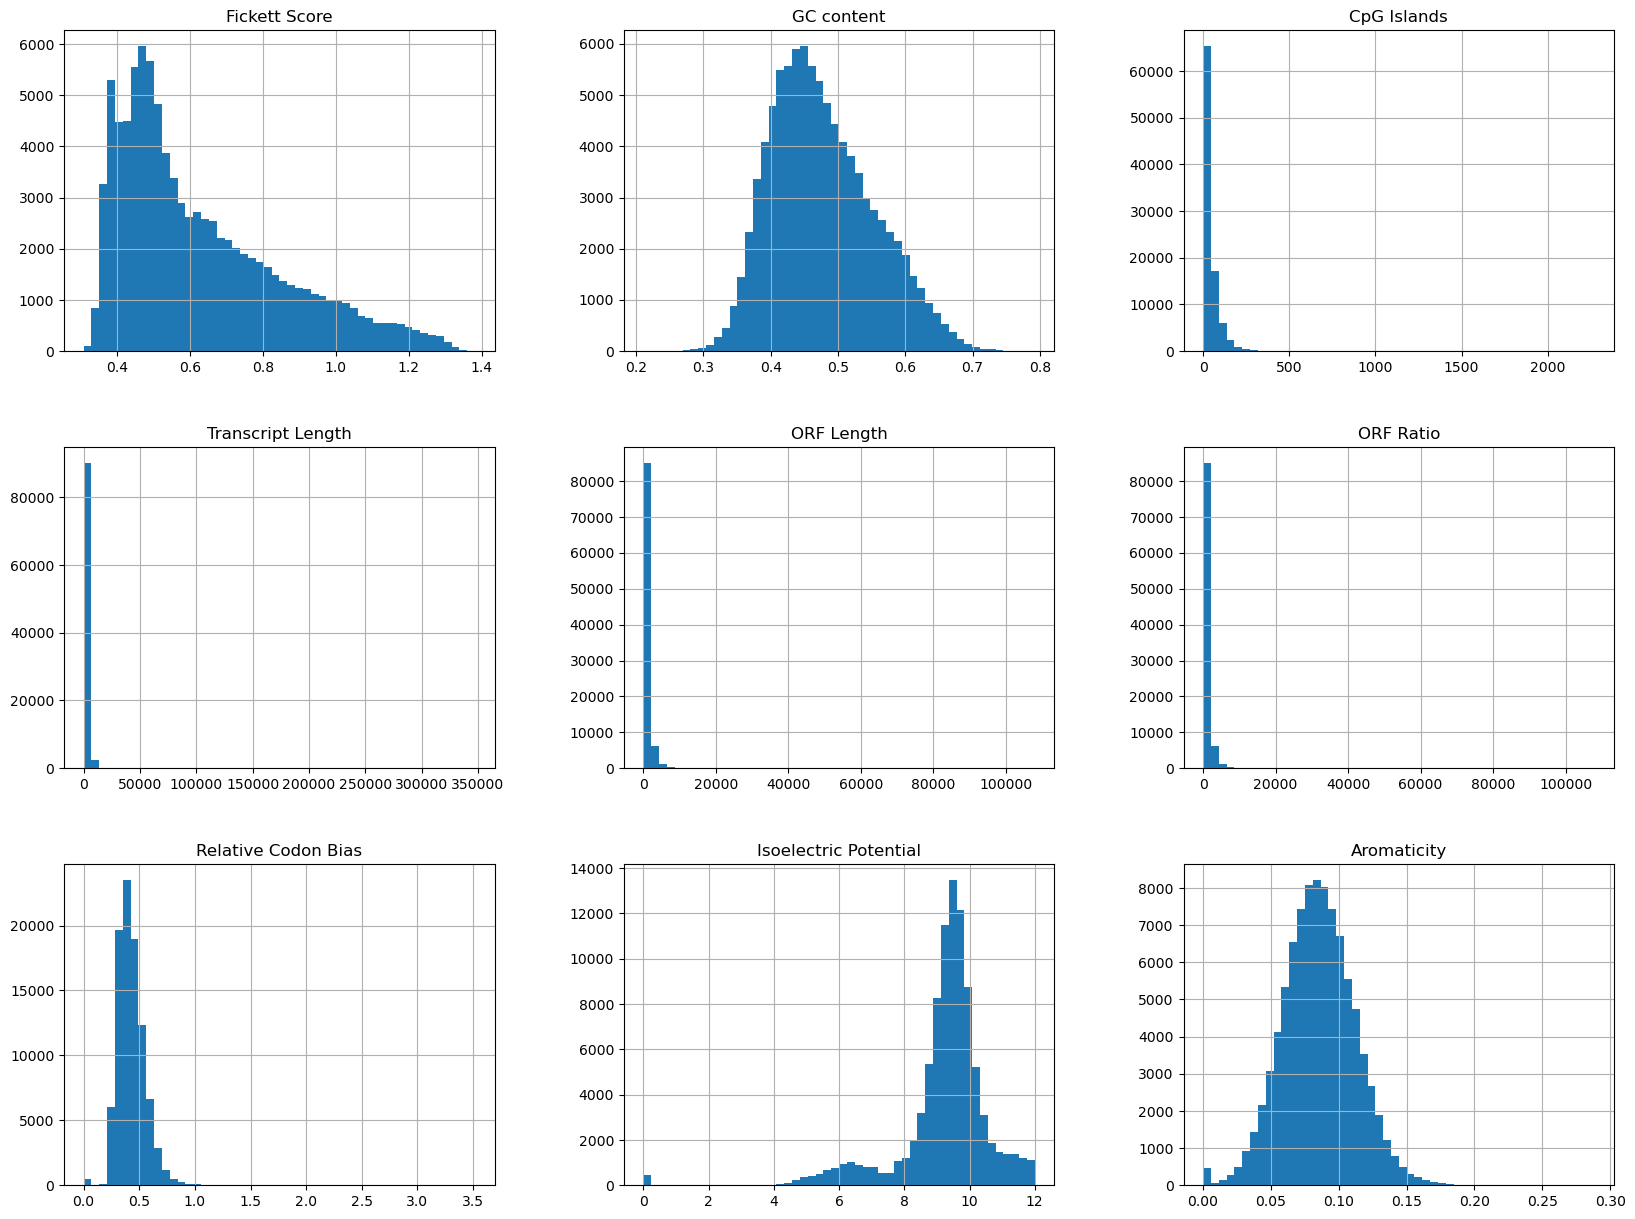

In [196]:
train.hist(bins=50, figsize=(20,15))  #plotting data
plt.show()

<Axes: xlabel='ORF Length', ylabel='ORF Ratio'>

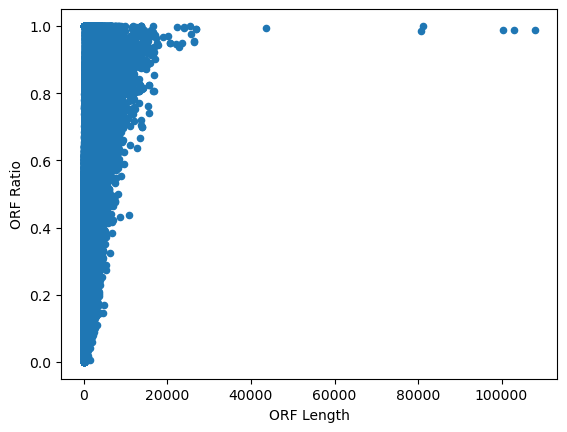

In [528]:
train.plot(kind = "scatter", x="ORF Length", y="ORF Ratio")  #they are same

<Axes: xlabel='Fickett Score', ylabel='Aromaticity'>

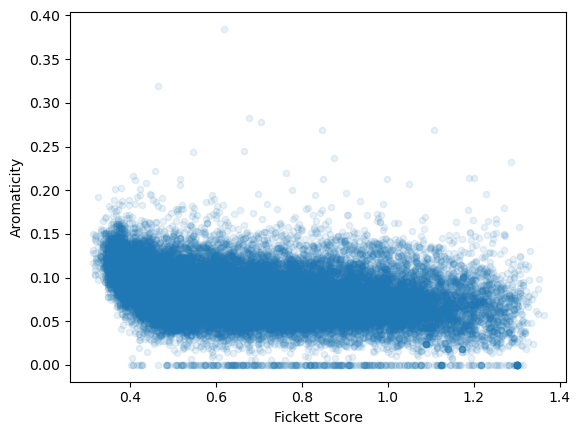

In [54]:
train.plot(kind = "scatter", x="Fickett Score", y="Aromaticity", alpha = 0.1)

In [55]:
train

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
42004,0.5192,0.492389,39,1511,246,0.377291,9.388354,0.059642,0,0.162806,0.158537,0.002002
39081,0.7625,0.439776,14,714,129,0.450682,9.939042,0.100840,0,0.180672,0.108527,0.003409
40913,0.4030,0.428345,27,2526,360,0.332507,8.249391,0.124703,0,0.142518,0.075000,0.001190
48023,0.3953,0.399819,21,2211,264,0.339052,9.044995,0.107191,0,0.119403,0.079545,0.001514
38401,0.5743,0.520635,19,945,93,0.496182,10.861069,0.073016,0,0.098413,0.204301,0.005598
...,...,...,...,...,...,...,...,...,...,...,...,...
30393,0.4155,0.448387,36,2480,210,0.281464,8.983234,0.092010,0,0.084677,0.171429,0.002135
19572,1.1427,0.533230,25,647,99,0.527747,9.072587,0.083721,1,0.153014,0.252525,0.005386
50400,0.9507,0.481283,2,187,96,1.111229,6.755451,0.064516,0,0.513369,0.020833,0.005013
40313,0.6853,0.483969,9,655,102,0.489470,8.779836,0.064220,0,0.155725,0.088235,0.004745


<Axes: xlabel='GC content', ylabel='Aromaticity'>

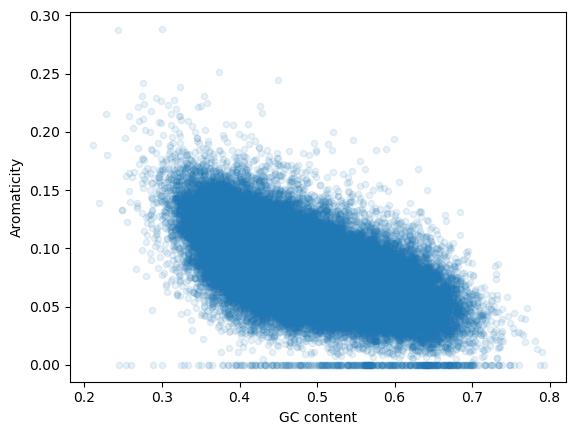

In [199]:
train.plot(kind = "scatter", x="GC content", y="Aromaticity", alpha = 0.1)

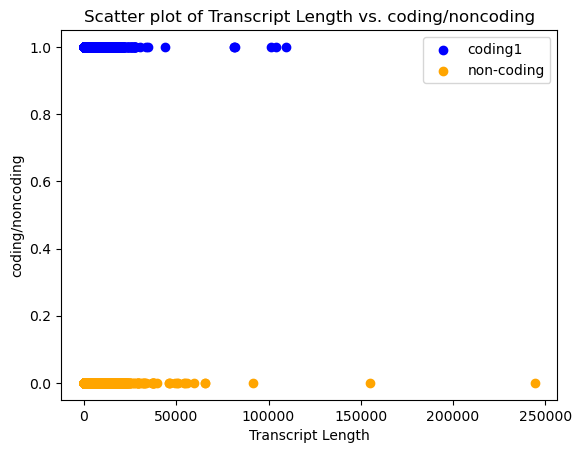

In [231]:
import matplotlib.pyplot as plt

# extract features and labels for coding and non-coding data
coding = data[data["coding/noncoding"] == 1]
noncoding = data[data["coding/noncoding"] == 0]

# choose a feature to plot
feature = "Transcript Length"

# plot coding data
plt.scatter(coding[feature], coding["coding/noncoding"], label="coding1", color="blue")

# plot non-coding data
plt.scatter(noncoding[feature], noncoding["coding/noncoding"], label="non-coding", color="orange")

# set plot title and axis labels
plt.title("Scatter plot of Transcript Length vs. coding/noncoding")
plt.xlabel("Transcript Length")
plt.ylabel("coding/noncoding")

# show legend
plt.legend()

# show plot
plt.show()


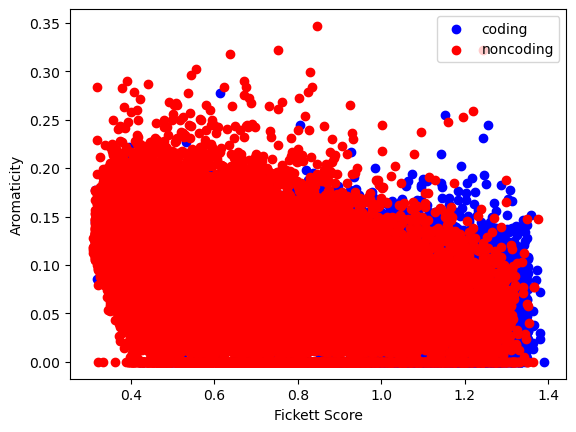

In [125]:
import matplotlib.pyplot as plt

# create the plot
plt.scatter(coding['Fickett Score'], coding['Aromaticity'], c='blue', label='coding')
plt.scatter(noncoding['Fickett Score'], noncoding['Aromaticity'], c='red', label='noncoding')

# set plot labels
plt.xlabel('Fickett Score')
plt.ylabel('Aromaticity')
plt.legend(loc='upper right')

# show the plot
plt.show()


### Heat Map

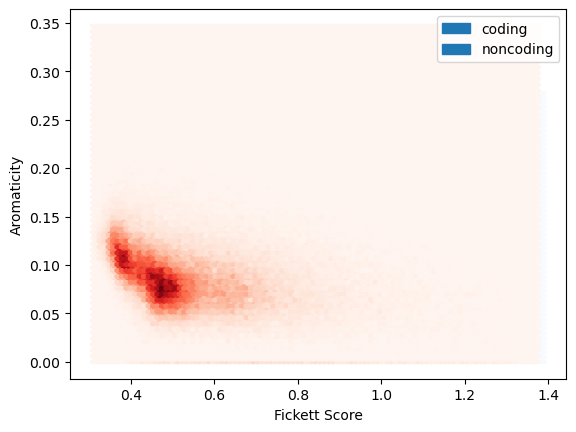

In [124]:
import matplotlib.pyplot as plt

# create the plot
plt.hexbin(coding['Fickett Score'], coding['Aromaticity'], gridsize=100, cmap='Blues')
plt.hexbin(noncoding['Fickett Score'], noncoding['Aromaticity'], gridsize=100, cmap='Reds')

# set plot labels
plt.xlabel('Fickett Score')
plt.ylabel('Aromaticity')
plt.legend(['coding', 'noncoding'])

# show the plot
plt.show()


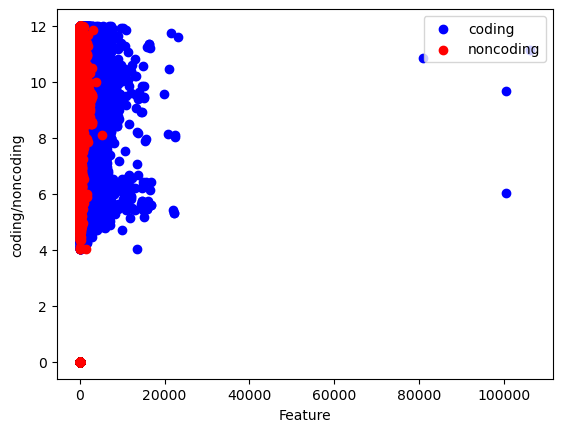

In [53]:
import matplotlib.pyplot as plt

# create the plot
plt.scatter(coding['ORF Length'], coding['Isoelectric Potential'], c='blue', label='coding')
plt.scatter(noncoding['ORF Length'], noncoding['Isoelectric Potential'], c='red', label='noncoding')

# set plot labels
plt.xlabel('Feature')
plt.ylabel('coding/noncoding')
plt.legend(loc='upper right')

# show the plot
plt.show()


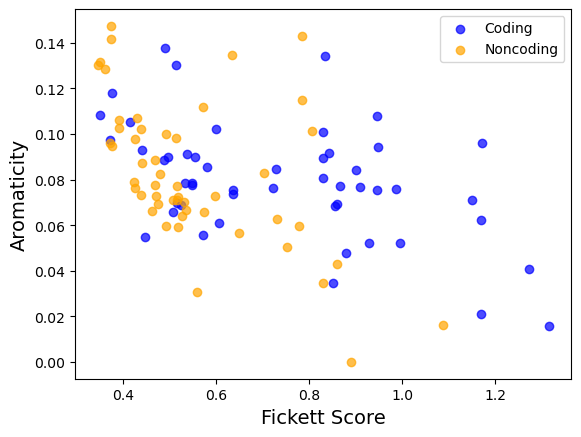

In [533]:
import matplotlib.pyplot as plt
import random

# randomly sample 1000 points from each dataset
coding_sample = coding.sample(n=50, random_state=1)
noncoding_sample = noncoding.sample(n=50, random_state=1)

# create the plot
plt.scatter(coding_sample['Fickett Score'], coding_sample['Aromaticity'], c='blue', label='Coding', alpha = 0.7)
plt.scatter(noncoding_sample['Fickett Score'], noncoding_sample['Aromaticity'], c='orange', label='Noncoding', alpha = 0.7)

# set plot labels
plt.xlabel('Fickett Score', fontsize = 14)
plt.ylabel('Aromaticity', fontsize = 14)
plt.legend(loc='upper right')

# show the plot
plt.show()


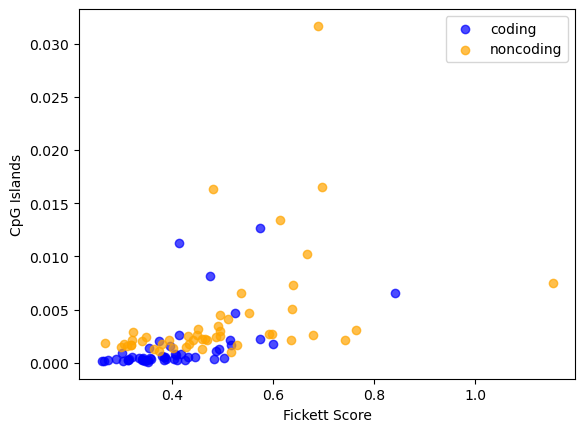

In [526]:
import matplotlib.pyplot as plt
import random

# randomly sample 1000 points from each dataset
coding_sample = coding.sample(n=50, random_state=1)
noncoding_sample = noncoding.sample(n=50, random_state=1)

# create the plot
plt.scatter(coding_sample['Relative Codon Bias'], coding_sample['GC content per ORF Length'], c='blue', label='coding', alpha = 0.7)
plt.scatter(noncoding_sample['Relative Codon Bias'], noncoding_sample['GC content per ORF Length'], c='orange', label='noncoding', alpha = 0.7)

# set plot labels
plt.xlabel('Fickett Score')
plt.ylabel('CpG Islands')
plt.legend(loc='upper right')

# show the plot
plt.show()


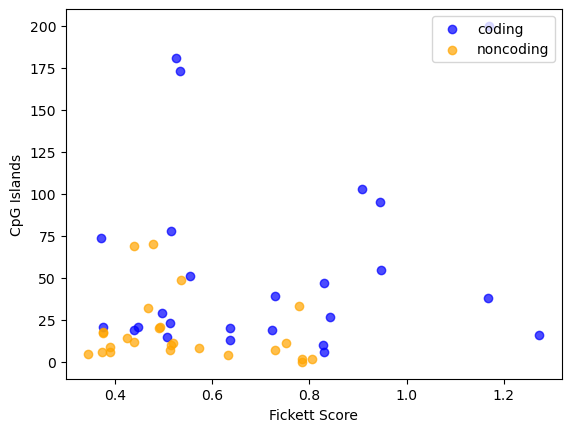

In [513]:
import matplotlib.pyplot as plt
import random

# randomly sample 1000 points from each dataset
coding_sample = coding.sample(n=25, random_state=1)
noncoding_sample = noncoding.sample(n=25, random_state=1)

# create the plot
plt.scatter(coding_sample['Fickett Score'], coding_sample['CpG Islands'], c='blue', label='coding', alpha = 0.7)
plt.scatter(noncoding_sample['Fickett Score'], noncoding_sample['CpG Islands'], c='orange', label='noncoding', alpha = 0.7)

# set plot labels
plt.xlabel('Fickett Score')
plt.ylabel('CpG Islands')
plt.legend(loc='upper right')

# show the plot
plt.show()


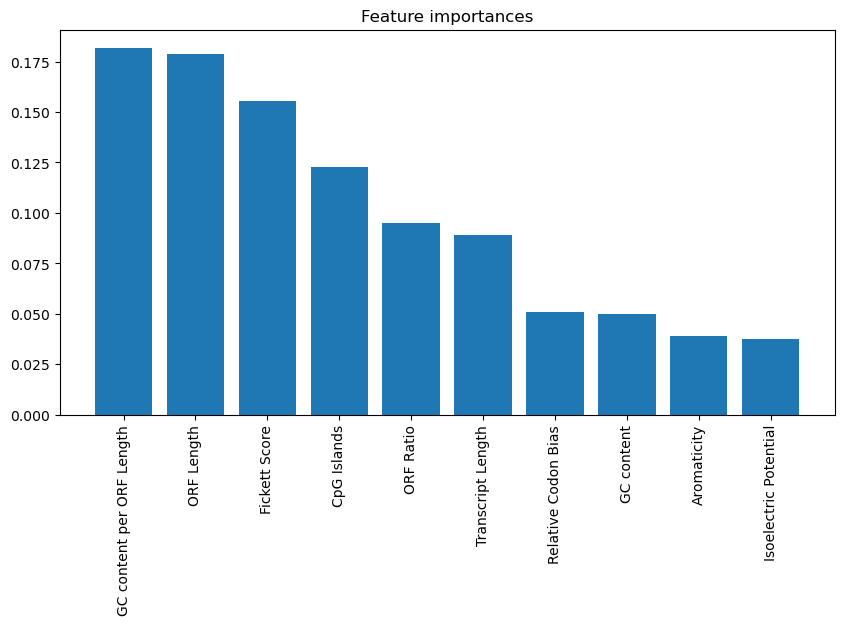

In [295]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a random forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances and their indices
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


In [552]:
shuffled_dataset

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
130060,0.4871,0.440096,15,1252,246,0.418197,9.973082,0.086331,0,0.196486,0.060976,0.001789
122973,0.4975,0.634871,89,1279,186,0.365943,11.686200,0.042254,0,0.145426,0.478495,0.003413
143354,0.3740,0.402494,9,2005,201,0.371544,9.831574,0.079341,0,0.100249,0.044776,0.002002
210043,0.4390,0.480164,11,731,141,0.427099,7.667375,0.106996,0,0.192886,0.078014,0.003405
106295,1.2011,0.611160,65,1147,681,0.424952,10.347965,0.023560,1,0.593723,0.095448,0.000897
...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.4394,0.467187,4,640,138,0.482877,9.163359,0.089202,0,0.215625,0.028986,0.003385
103694,0.6674,0.402305,131,5379,3378,0.282702,9.935884,0.108199,1,0.627998,0.038780,0.000119
131932,0.3939,0.463635,118,5651,330,0.332367,9.824224,0.101488,0,0.058397,0.357576,0.001405
146867,0.4794,0.401091,2,733,159,0.525984,9.331428,0.098361,0,0.216917,0.012579,0.002523


In [553]:
import pandas as pd
import matplotlib.pyplot as plt

# assume that shuffled_dataset is your dataset
summary = shuffled_dataset.describe()

# extract quartile values from summary statistics
quartiles = summary.loc[['25%','50%','75%']]

# create a boxplot
quartiles.transpose().plot(kind='violin')

# set the title and axis labels
plt.title('Boxplot of Quartile Values')
plt.xlabel('Features')
plt.ylabel('Values')

# show the plot
plt.show()


ValueError: violin is not a valid plot kind

# Feature Importance Plot (Random Forest)

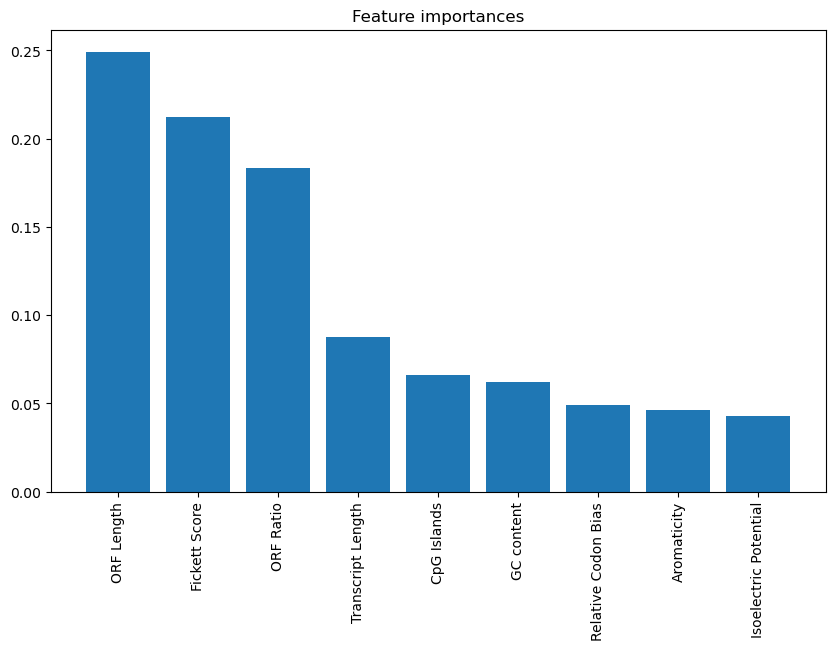

In [265]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a random forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances and their indices
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


In [78]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a random forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances and their indices
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# # Plot the feature importances
# plt.figure(figsize=(10, 6))
# plt.title("Feature importances")
# plt.bar(range(X_train.shape[1]), importances[indices])
# plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
# plt.show()


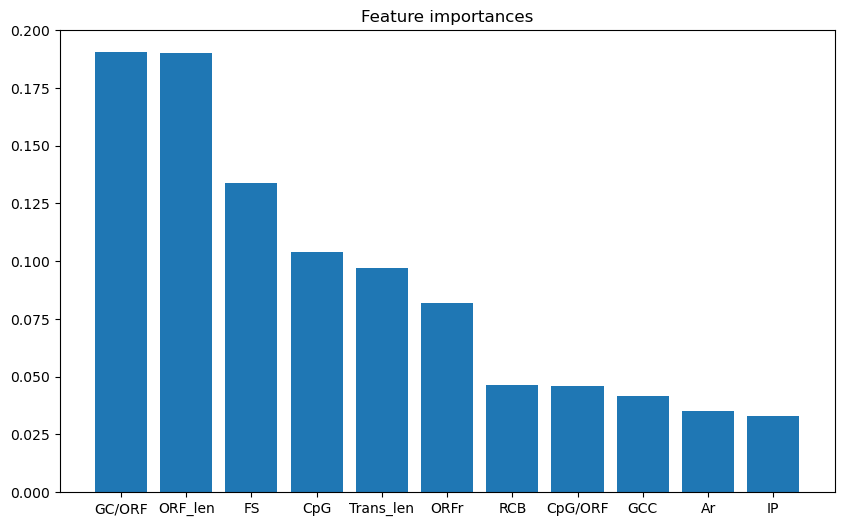

In [80]:
# Define a dictionary of short names for each feature
short_names = {
    'GC content per ORF Length': 'GC/ORF',
    'ORF Length': 'ORF_len',
    'Fickett Score': 'FS',
    'CpG Islands' : 'CpG',
    'Transcript Length' : 'Trans_len',
    'ORF Ratio' : 'ORFr',
    'CpG Islands per ORF Length' : 'CpG/ORF',
    'Relative Codon Bias' : 'RCB',
    'GC content' : 'GCC',
    'Aromaticity' : 'Ar',
    'Isoelectric Potential' : 'IP'
    # Add short names for each feature here
}

# Generate a list of new x-axis labels using the short names dictionary
new_labels = [short_names.get(col, col) for col in X_train.columns[indices]]

# Plot the feature importances with the new x-axis labels
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), new_labels, rotation=0)
plt.show()


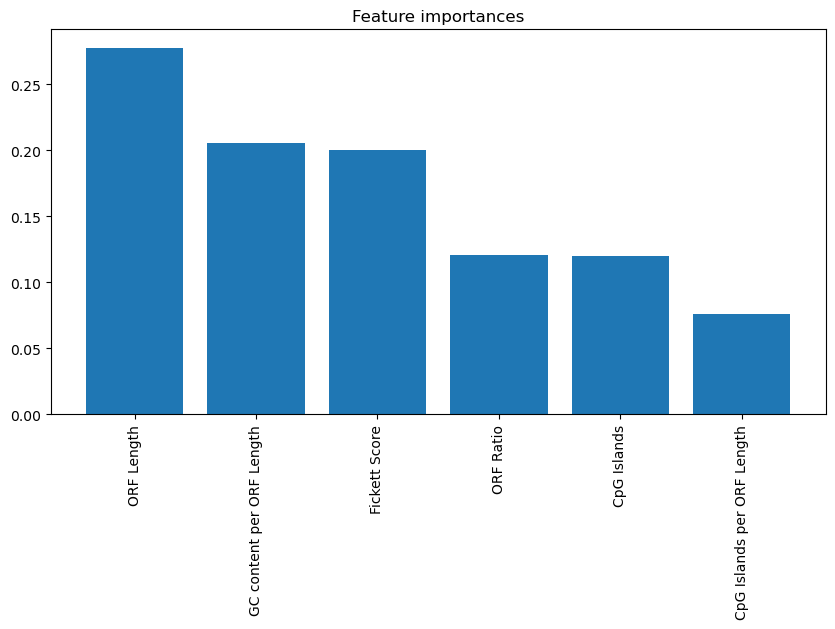

In [167]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a random forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances and their indices
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


### Bar Graphs

In [169]:
shuffled_dataset

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
130060,0.4871,0.440096,15,1252,246,0.418197,9.973082,0.086331,0,0.196486,0.060976,0.001789
122973,0.4975,0.634871,89,1279,186,0.365943,11.686200,0.042254,0,0.145426,0.478495,0.003413
143354,0.3740,0.402494,9,2005,201,0.371544,9.831574,0.079341,0,0.100249,0.044776,0.002002
210043,0.4390,0.480164,11,731,141,0.427099,7.667375,0.106996,0,0.192886,0.078014,0.003405
106295,1.2011,0.611160,65,1147,681,0.424952,10.347965,0.023560,1,0.593723,0.095448,0.000897
...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.4394,0.467187,4,640,138,0.482877,9.163359,0.089202,0,0.215625,0.028986,0.003385
103694,0.6674,0.402305,131,5379,3378,0.282702,9.935884,0.108199,1,0.627998,0.038780,0.000119
131932,0.3939,0.463635,118,5651,330,0.332367,9.824224,0.101488,0,0.058397,0.357576,0.001405
146867,0.4794,0.401091,2,733,159,0.525984,9.331428,0.098361,0,0.216917,0.012579,0.002523


In [172]:
coding

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
0,0.3871,0.359435,18,2618,981,0.284229,9.588915,0.112385,1,0.374714,0.018349,0.000366
1,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000,0.008520,0.000490
2,0.9340,0.460064,8,939,939,0.460470,9.042610,0.137821,1,1.000000,0.008520,0.000490
3,1.0718,0.699278,302,3465,2535,0.270346,11.870000,0.051948,1,0.731602,0.119132,0.000276
4,1.0718,0.699250,302,3468,2538,0.271500,11.870000,0.051903,1,0.731834,0.118991,0.000276
...,...,...,...,...,...,...,...,...,...,...,...,...
111195,0.8228,0.384946,11,1395,1206,0.334988,9.944393,0.088172,1,0.864516,0.009121,0.000319
111196,0.4149,0.409025,11,1374,645,0.416163,10.096990,0.113537,1,0.469432,0.017054,0.000634
111197,0.6311,0.369942,8,1038,612,0.560306,9.749312,0.110465,1,0.589595,0.013072,0.000604
111198,0.4149,0.407194,11,1390,645,0.421026,10.093057,0.112311,1,0.464029,0.017054,0.000631


In [173]:
noncoding

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
0,0.5161,0.553539,23,1653,390,0.466010,8.557163,0.079855,0,0.235935,0.058974,0.001419
1,0.5317,0.552933,21,1483,402,0.428935,8.525573,0.056680,0,0.271072,0.052239,0.001375
2,0.6679,0.580696,10,632,180,0.591729,8.961508,0.057143,0,0.284810,0.055556,0.003226
3,0.5273,0.617357,18,507,165,0.659118,11.371079,0.059172,0,0.325444,0.109091,0.003742
4,0.6262,0.597692,34,1213,165,0.529159,10.728845,0.059406,0,0.136026,0.206061,0.003622
...,...,...,...,...,...,...,...,...,...,...,...,...
111195,0.4830,0.494624,7,558,159,0.459977,4.953825,0.096774,0,0.284946,0.044025,0.003111
111196,0.5244,0.574233,52,815,183,0.418751,9.658154,0.077491,0,0.224540,0.284153,0.003138
111197,0.5020,0.415437,3,881,120,0.450101,9.149240,0.129693,0,0.136209,0.025000,0.003462
111198,0.4081,0.373988,18,3706,357,0.261959,9.695288,0.111741,0,0.096330,0.050420,0.001048


In [ ]:
# coding_avg = np.mean(data.loc[data["Region"] == "coding"])

In [178]:
Fickett_mean_value_coding = coding["Fickett Score"].mean()

In [179]:
Fickett_mean_value_coding

0.7663736636690647

In [180]:
Fickett_mean_value_nc = noncoding["Fickett Score"].mean()

In [181]:
Fickett_mean_value_nc

0.5601802392086331

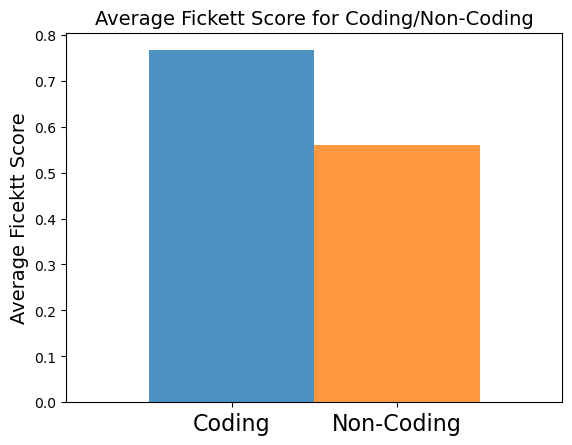

In [534]:
import matplotlib.pyplot as plt
import numpy as np

# Create some example data
values = [Fickett_mean_value_coding, Fickett_mean_value_nc]

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(values))

# Set the width of the bars
width = 1
padding = 1

colors = ['#1f77b4', '#ff7f0e']
# Create the bar graph
plt.bar(x_pos, values, width, align='center', alpha=0.8, color = colors)

# Set the x-axis labels
plt.xticks(x_pos, ['Coding', 'Non-Coding'], fontsize = 16, ha='center')

# Set the y-axis label and title
plt.ylabel('Average Ficektt Score', fontsize = 14)
plt.title('Average Fickett Score for Coding/Non-Coding', fontsize = 14)
plt.xlim(x_pos[0]-padding, x_pos[-1]+padding)


# Show the plot
plt.show()


In [543]:
Aromaticity_coding = coding["Aromaticity"].mean()

In [544]:
Aromaticity_coding

0.0806728405914785

In [545]:
Aromaticity_noncoding = noncoding["Aromaticity"].mean()

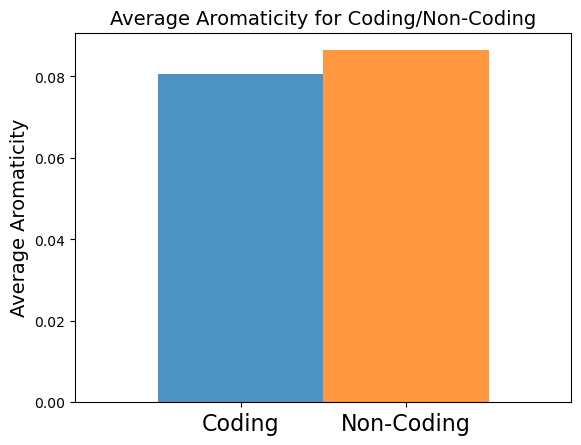

In [548]:
import matplotlib.pyplot as plt
import numpy as np

# Create some example data
values = [Aromaticity_coding, Aromaticity_noncoding]

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(values))

# Set the width of the bars
width = 1
padding = 1

colors = ['#1f77b4', '#ff7f0e']
# Create the bar graph
plt.bar(x_pos, values, width, align='center', alpha=0.8, color = colors)

# Set the x-axis labels
plt.xticks(x_pos, ['Coding', 'Non-Coding'], fontsize = 16, ha='center')

# Set the y-axis label and title
plt.ylabel('Average Aromaticity', fontsize = 14)
plt.title('Average Aromaticity for Coding/Non-Coding', fontsize = 14)
plt.xlim(x_pos[0]-padding, x_pos[-1]+padding)


# Show the plot
plt.show()


## Consfusion Matrix, Sensitivity, Specificity

In [337]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() #tn = true negative, fp = false positive, fn = false negative, tp = true positive

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Sensitivity: 0.8714863044454423
Specificity: 0.9196307969383161


## Scatter Plot trying out

In [37]:
coding

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
0,0.6391,0.501376,114,3634,1944,0.322560,8.927276,0.104046,1,0.534948,0.058642,0.000258
1,0.8531,0.457314,61,4170,4116,0.347844,8.316115,0.082793,1,0.987050,0.014820,0.000111
2,0.8251,0.396419,79,6869,6288,0.312727,9.805786,0.110092,1,0.915417,0.012564,0.000063
3,0.6904,0.500799,150,3127,1260,0.315474,11.253811,0.093090,1,0.402942,0.119048,0.000397
4,0.7556,0.562974,118,1977,1047,0.311252,11.112109,0.086495,1,0.529590,0.112703,0.000538
...,...,...,...,...,...,...,...,...,...,...,...,...
25995,1.1520,0.373166,16,1908,1815,0.652212,9.203587,0.105512,1,0.951258,0.008815,0.000206
25996,1.1458,0.380567,19,1976,1911,0.679175,9.372752,0.069909,1,0.967105,0.009942,0.000199
25997,0.8190,0.385642,34,3148,1578,0.393392,9.458237,0.074357,1,0.501271,0.021546,0.000244
25998,0.4243,0.359924,24,3673,1065,0.325572,9.451855,0.088307,1,0.289954,0.022535,0.000338


In [38]:
noncoding

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
0,0.4185,0.342056,3,1070,102,0.314484,9.500077,0.112360,0,0.095327,0.029412,0.003353
1,0.4424,0.407946,12,2819,171,0.315179,9.791861,0.092652,0,0.060660,0.070175,0.002386
2,0.3758,0.369906,8,2233,123,0.329884,10.066754,0.103495,0,0.055083,0.065041,0.003007
3,0.3568,0.386748,8,2309,171,0.315510,8.789765,0.118336,0,0.074058,0.046784,0.002262
4,0.5301,0.412000,2,250,174,0.680640,9.186181,0.085366,0,0.696000,0.011494,0.002368
...,...,...,...,...,...,...,...,...,...,...,...,...
25995,0.6322,0.456140,5,456,126,0.524696,10.014599,0.059211,0,0.276316,0.039683,0.003620
25996,0.3799,0.403333,8,1500,162,0.359007,6.987126,0.092000,0,0.108000,0.049383,0.002490
25997,0.7327,0.407323,1,437,108,0.710189,9.713016,0.055172,0,0.247140,0.009259,0.003772
25998,0.8088,0.430894,13,1230,684,0.427835,8.005507,0.092683,0,0.556098,0.019006,0.000630


In [39]:
fickett_coding = coding["Fickett Score"]

In [45]:
fickett_noncoding = noncoding["Fickett Score"]

In [41]:
fickett_coding

0        0.6391
1        0.8531
2        0.8251
3        0.6904
4        0.7556
          ...  
25995    1.1520
25996    1.1458
25997    0.8190
25998    0.4243
25999    0.8068
Name: Fickett Score, Length: 26000, dtype: float64

In [46]:
fickett_noncoding

0        0.4185
1        0.4424
2        0.3758
3        0.3568
4        0.5301
          ...  
25995    0.6322
25996    0.3799
25997    0.7327
25998    0.8088
25999    0.7663
Name: Fickett Score, Length: 26000, dtype: float64

ValueError: x and y must be the same size

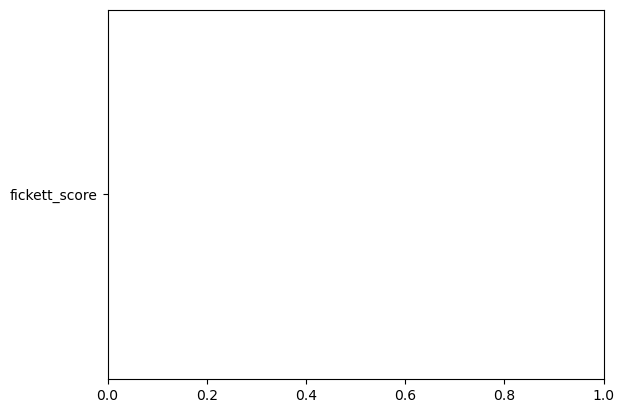

In [47]:
import matplotlib.pyplot as plt
import random

# randomly sample 1000 points from each dataset
coding_sample = coding.sample(n=25, random_state=1)
noncoding_sample = noncoding.sample(n=25, random_state=1)

# create the plot
plt.scatter(coding_sample['Fickett Score'], "fickett_score", c='blue', label='coding', alpha = 0.7)
plt.scatter(noncoding_sample['Fickett Score'], noncoding_sample['CpG Islands'], c='orange', label='noncoding', alpha = 0.7)

# set plot labels
plt.xlabel('Fickett Score')
plt.ylabel('CpG Islands')
plt.legend(loc='upper right')

# show the plot
plt.show()


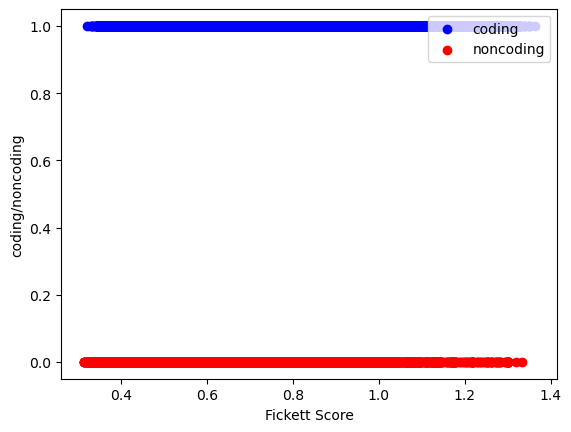

In [48]:
import matplotlib.pyplot as plt


plt.scatter(coding['Fickett Score'], coding['coding/noncoding'], c='blue', label='coding')
plt.scatter(noncoding['Fickett Score'], noncoding['coding/noncoding'], c='red', label='noncoding')


plt.xlabel('Fickett Score')
plt.ylabel('coding/noncoding')
plt.legend(loc='upper right')


plt.show()


In [ ]:
df = shuffled_

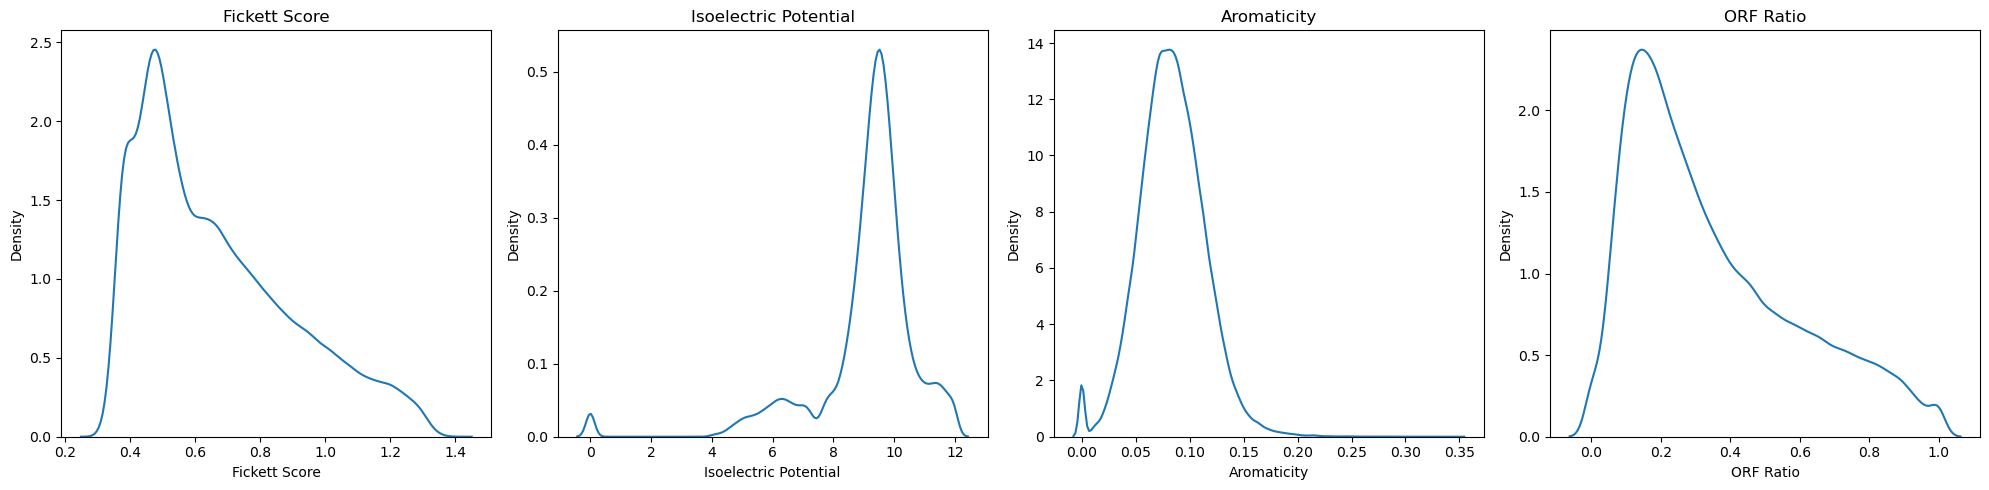

In [70]:
import seaborn as sns


df = shuffled_dataset.drop(["GC content per ORF Length", "Transcript Length", "coding/noncoding", "ORF Length", "CpG Islands", "Relative Codon Bias", "GC content"], axis=1)

# Create subplots for each column in the dataframe
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(20, 5))

# Loop through each column and create a density plot
for i, col in enumerate(df.columns):
    sns.kdeplot(df[col], ax=axs[i])
    axs[i].set_title(col)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


##  Drawing graph for feature combinations

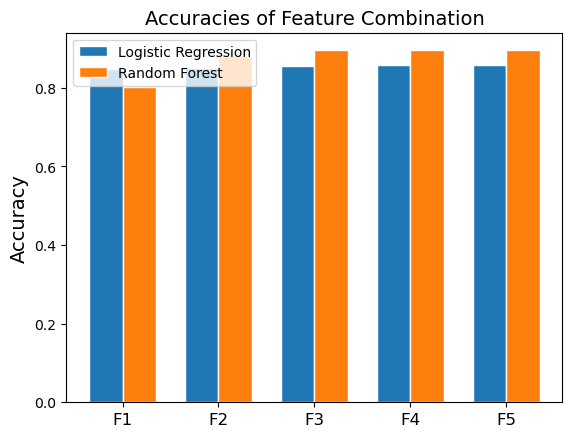

In [194]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
features = ['F1', 'F2', 'F3', 'F4', 'F5']
logistic_acc = [0.84683, 0.85038, 0.85440, 0.85811, 0.85888]
rf_acc = [0.80161, 0.87969, 0.895188, 0.8953462, 0.895256]

# Set the width of the bars
bar_width = 0.35

# Set the x position of the bars
r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]

# Create the figure and axis
fig, ax = plt.subplots()

# Create the bars for logistic regression
ax.bar(r1, logistic_acc, width=bar_width, edgecolor='white', label='Logistic Regression')

# Create the bars for random forest
ax.bar(r2, rf_acc, width=bar_width, edgecolor='white', label='Random Forest')

# Set the x-axis tick labels
ax.set_xticks([r + bar_width/2 for r in range(len(features))])
ax.set_xticklabels(features, fontsize=12)

# Set the y-axis label and title
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Accuracies of Feature Combination', fontsize=14)

# Add a legend
ax.legend()

# Show the plot
plt.show()


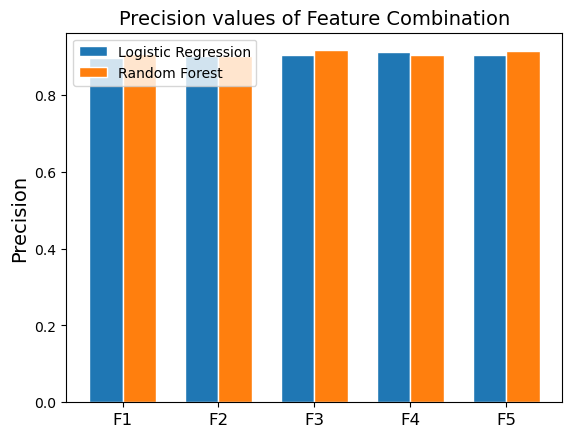

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
features = ['F1', 'F2', 'F3', 'F4', 'F5']
logistic_acc = [0.8969, 0.9020, 0.90318,  0.913, 0.90449]
rf_acc = [0.90722, 0.90071, 0.916253, 0.90341, 0.914942]

# Set the width of the bars
bar_width = 0.35

# Set the x position of the bars
r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]

# Create the figure and axis
fig, ax = plt.subplots()

# Create the bars for logistic regression
ax.bar(r1, logistic_acc, width=bar_width, edgecolor='white', label='Logistic Regression')

# Create the bars for random forest
ax.bar(r2, rf_acc, width=bar_width, edgecolor='white', label='Random Forest')

# Set the x-axis tick labels
ax.set_xticks([r + bar_width/2 for r in range(len(features))])
ax.set_xticklabels(features, fontsize=12)

# Set the y-axis label and title
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Precision values of Feature Combination', fontsize=14)



# Add a legend
ax.legend(loc = "upper left")

# Show the plot
plt.show()


## Standard Deviation Graph

In [202]:
shuffled_dataset

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
130060,0.4871,0.440096,15,1252,246,0.418197,9.973082,0.086331,0,0.196486,0.060976,0.001789
122973,0.4975,0.634871,89,1279,186,0.365943,11.686200,0.042254,0,0.145426,0.478495,0.003413
143354,0.3740,0.402494,9,2005,201,0.371544,9.831574,0.079341,0,0.100249,0.044776,0.002002
210043,0.4390,0.480164,11,731,141,0.427099,7.667375,0.106996,0,0.192886,0.078014,0.003405
106295,1.2011,0.611160,65,1147,681,0.424952,10.347965,0.023560,1,0.593723,0.095448,0.000897
...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.4394,0.467187,4,640,138,0.482877,9.163359,0.089202,0,0.215625,0.028986,0.003385
103694,0.6674,0.402305,131,5379,3378,0.282702,9.935884,0.108199,1,0.627998,0.038780,0.000119
131932,0.3939,0.463635,118,5651,330,0.332367,9.824224,0.101488,0,0.058397,0.357576,0.001405
146867,0.4794,0.401091,2,733,159,0.525984,9.331428,0.098361,0,0.216917,0.012579,0.002523


In [204]:
shuffled_dataset.describe()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
count,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000
mean,0.663277,0.485809,40.460112,1804.079978,685.418255,0.459111,9.124282,0.083551,0.500000,0.350139,0.104468,0.002890
std,0.237269,0.083655,54.508933,2222.823848,1215.624281,0.158063,1.688495,0.030358,0.500001,0.241484,0.199030,0.005149
min,0.308600,0.019802,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.472300,0.422369,8.000000,566.000000,135.000000,0.354751,8.820516,0.063910,0.000000,0.158416,0.032811,0.000580
50%,0.605800,0.478229,22.000000,1004.000000,249.000000,0.436896,9.432708,0.082621,0.500000,0.282209,0.060606,0.001825
75%,0.815500,0.546615,52.000000,2310.000000,801.000000,0.540036,9.930678,0.102639,1.000000,0.502338,0.114583,0.003360
max,1.389500,0.884831,1884.000000,244296.000000,107976.000000,4.955947,11.999968,0.346667,1.000000,1.000000,13.500000,0.130172


In [211]:
shuffled_dataset.describe()

,Fickett Score,GC content,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
count,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000
mean,0.663277,0.485809,0.459111,9.124282,0.083551,0.500000,0.350139,0.104468,0.002890
std,0.237269,0.083655,0.158063,1.688495,0.030358,0.500001,0.241484,0.199030,0.005149
min,0.308600,0.019802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.472300,0.422369,0.354751,8.820516,0.063910,0.000000,0.158416,0.032811,0.000580
50%,0.605800,0.478229,0.436896,9.432708,0.082621,0.500000,0.282209,0.060606,0.001825
75%,0.815500,0.546615,0.540036,9.930678,0.102639,1.000000,0.502338,0.114583,0.003360
max,1.389500,0.884831,4.955947,11.999968,0.346667,1.000000,1.000000,13.500000,0.130172


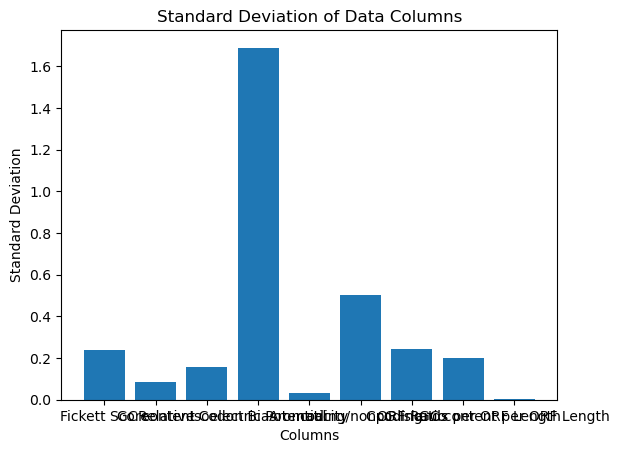

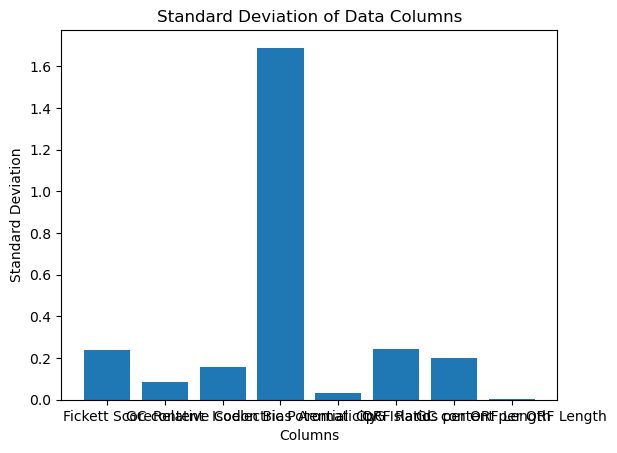

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

shuffled_dataset = shuffled_dataset.drop(["coding/noncoding"], axis=1)
describe_row = shuffled_dataset.describe()


# create the bar plot with the renamed labels
fig, ax = plt.subplots()
ax.bar(std_row.index, std_row.values)
ax.set_xlabel('Columns')
ax.set_ylabel('Standard Deviation')
ax.set_title('Standard Deviation of Data Columns')
plt.show()


# extract the standard deviation row
std_row = describe_row.loc['std']

# create the bar plot
fig, ax = plt.subplots()
ax.bar(std_row.index, std_row.values)
ax.set_xlabel('Columns')
ax.set_ylabel('Standard Deviation')
ax.set_title('Standard Deviation of Data Columns')
plt.show()


In [277]:
shuffled_dataset.describe()

,Fickett Score,GC content,Relative Codon Bias,Isoelectric Potential,Aromaticity,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
count,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000,222400.000000
mean,0.663277,0.485809,0.459111,9.124282,0.083551,0.350139,0.104468,0.002890
std,0.237269,0.083655,0.158063,1.688495,0.030358,0.241484,0.199030,0.005149
min,0.308600,0.019802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.472300,0.422369,0.354751,8.820516,0.063910,0.158416,0.032811,0.000580
50%,0.605800,0.478229,0.436896,9.432708,0.082621,0.282209,0.060606,0.001825
75%,0.815500,0.546615,0.540036,9.930678,0.102639,0.502338,0.114583,0.003360
max,1.389500,0.884831,4.955947,11.999968,0.346667,1.000000,13.500000,0.130172


/tmp/ipykernel_10387/1161470986.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(std_row.index, rotation=0, alpha= 0.1)


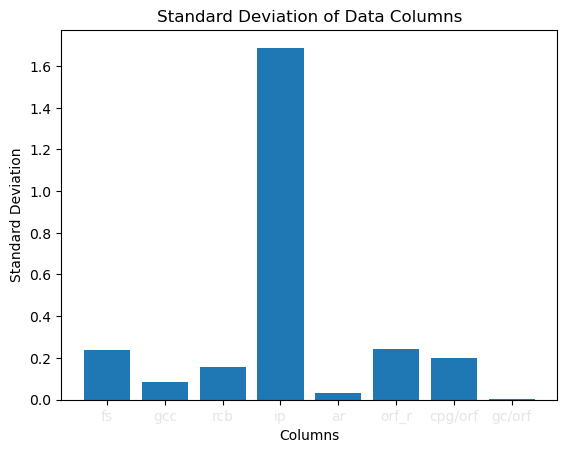

In [284]:
# create the bar plot
fig, ax = plt.subplots()
ax.bar(std_row.index, std_row.values, alp)

# rename the indices
new_indices = ['fs', 'gcc', 'rcb', 'ip', 'ar', 'orf_r', 'cpg/orf', 'gc/orf']
std_row = std_row.rename(index=dict(zip(std_row.index, new_indices)))

# set the x-axis labels
ax.set_xticklabels(std_row.index, rotation=0)

ax.set_xlabel('Columns')
ax.set_ylabel('Standard Deviation')
ax.set_title('Standard Deviation of Data Columns')
plt.show()


In [279]:
# extract the standard deviation row
std_row = describe_row.loc['std']


In [280]:
std_row

Fickett Score                 0.237269
GC content                    0.083655
Relative Codon Bias           0.158063
Isoelectric Potential         1.688495
Aromaticity                   0.030358
ORF Ratio                     0.241484
CpG Islands per ORF Length    0.199030
GC content per ORF Length     0.005149
Name: std, dtype: float64

In [267]:
# create a dictionary of old and new feature names
feature_dict = {'FS': 'Fickett Score', 'GCc': 'GC content', 'RCB': 'Relative Codon Bias', 'IP': 'Isoelectric Potential', 'Ar': 'Aromaticity', 'CpG/ORF': 'CpG Islands per ORF Length', 'GC/ORF': 'GC content per ORF Length'}
features = ['FS', 'GCc', 'RCB', 'IP', 'Ar', 'CpG/ORF', 'GC/ORF']
# rename the index labels using the dictionary
std_row_renamed = std_row.rename(features)

TypeError: Series.name must be a hashable type

In [265]:
features

['FS', 'GCc', 'RCB', 'IP', 'Ar', 'CpG/ORF', 'GC/ORF']

In [261]:
feature_dict

{'FS': 'Fickett Score',
 'GCc': 'GC content',
 'RCB': 'Relative Codon Bias',
 'IP': 'Isoelectric Potential',
 'Ar': 'Aromaticity',
 'CpG/ORF': 'CpG Islands per ORF Length',
 'GC/ORF': 'GC content per ORF Length'}

In [262]:
std_row_renamed

Fickett Score                 0.237269
GC content                    0.083655
Relative Codon Bias           0.158063
Isoelectric Potential         1.688495
Aromaticity                   0.030358
coding/noncoding              0.500001
ORF Ratio                     0.241484
CpG Islands per ORF Length    0.199030
GC content per ORF Length     0.005149
Name: std, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (9,).

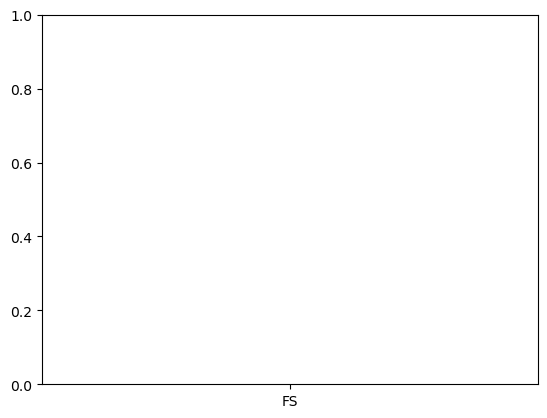

In [266]:
std_row = describe_row.loc['std']

# create the bar plot
fig, ax = plt.subplots()
ax.bar(features, std_row.values)
ax.set_xlabel('Columns')
ax.set_ylabel('Standard Deviation')
ax.set_title('Standard Deviation of Data Columns')
plt.show()

In [248]:
shuffled_dataset

,Fickett Score,GC content,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding,ORF Ratio,CpG Islands per ORF Length,GC content per ORF Length
130060,0.4871,0.440096,0.418197,9.973082,0.086331,0,0.196486,0.060976,0.001789
122973,0.4975,0.634871,0.365943,11.686200,0.042254,0,0.145426,0.478495,0.003413
143354,0.3740,0.402494,0.371544,9.831574,0.079341,0,0.100249,0.044776,0.002002
210043,0.4390,0.480164,0.427099,7.667375,0.106996,0,0.192886,0.078014,0.003405
106295,1.2011,0.611160,0.424952,10.347965,0.023560,1,0.593723,0.095448,0.000897
...,...,...,...,...,...,...,...,...,...
119879,0.4394,0.467187,0.482877,9.163359,0.089202,0,0.215625,0.028986,0.003385
103694,0.6674,0.402305,0.282702,9.935884,0.108199,1,0.627998,0.038780,0.000119
131932,0.3939,0.463635,0.332367,9.824224,0.101488,0,0.058397,0.357576,0.001405
146867,0.4794,0.401091,0.525984,9.331428,0.098361,0,0.216917,0.012579,0.002523


## Error Metrics

### LR

In [173]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.896938051302849
Recall:  0.7944768747193534
F1 Score:  0.8426040575292885


In [175]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.9020608039175678
Recall:  0.7940727436012573
F1 Score:  0.8446291254716531


In [177]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.9031883179222879
Recall:  0.8026493039964078
F1 Score:  0.8499560162620956


In [179]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.9031883179222879
Recall:  0.8026493039964078
F1 Score:  0.8499560162620956


In [181]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.904496939652992
Recall:  0.8029187247418051
F1 Score:  0.8506862675134994


### RF

In [184]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.9072291430728577
Recall:  0.863313875168388
F1 Score:  0.8847268878560581


In [187]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.9067194048123558
Recall:  0.864660978895375
F1 Score:  0.8851908888224884


In [190]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.9162531310553429
Recall:  0.8705433318365514
F1 Score:  0.8928135577609431


In [193]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.9149427453937138
Recall:  0.8718455321059722
F1 Score:  0.8928743878043733
